# Tesla - Stock Price Prediction

---



## Business Problem

In this notebook, our purpose is to predict of tesla - stock price.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
df = pd.read_csv('/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))  # Fonksiyon çağrısına dikkat edin
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantile #####################")
    print(dataframe.select_dtypes(include='number').quantile([0, 0.05, 0.5, 0.95, 0.99, 1]).T)


In [5]:
check_df(df)

##################### Shape #####################
(2416, 7)
##################### Types #####################
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
##################### Head #####################
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
##################### Tail #####################
            Date        Open        High         Low       Close   Adj Close  \
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575

## Data Preparation

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
tesla_df = df[["Date", "Close"]]

In [9]:
tesla_df.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [10]:
print("Min Date: ", tesla_df["Date"].min())
print("Max Date: ", tesla_df["Date"].max())

Min Date:  2010-06-29 00:00:00
Max Date:  2020-02-03 00:00:00


In [11]:
tesla_df.index = tesla_df["Date"]

In [12]:
tesla_df

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [13]:
tesla_df.drop("Date", axis=1, inplace=True)

In [14]:
tesla_df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [15]:
result_df = tesla_df.copy()

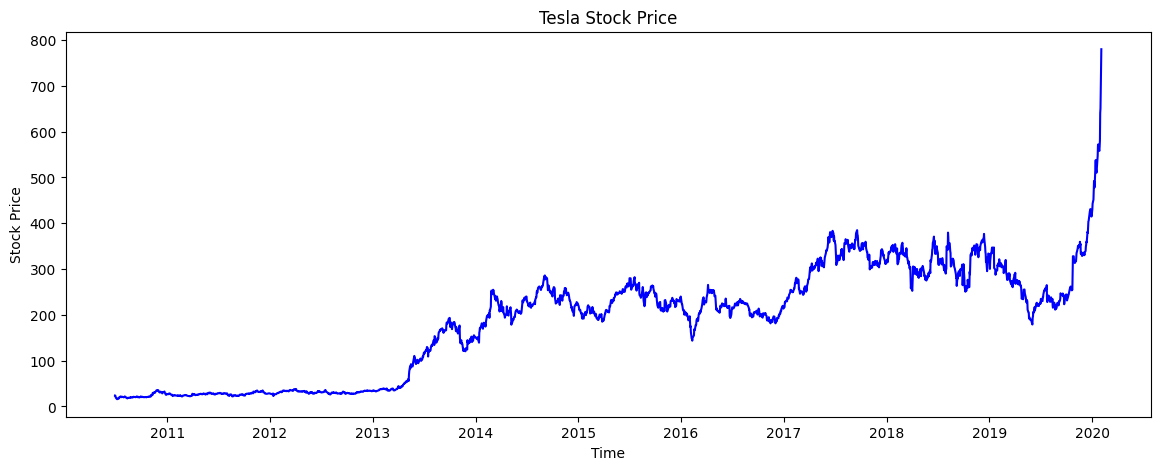

In [16]:
plt.figure(figsize=(14,5))
plt.plot(tesla_df['Close'], color='blue')
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [17]:
tesla_df = tesla_df.values

In [18]:
tesla_df[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

In [19]:
tesla_df = tesla_df.astype("float32")

In [20]:
def split_data(dataframe, test_size):
  position = int(round(len(dataframe) * (1 - test_size)))
  train = dataframe[:position]
  test = dataframe[position:]
  return train, test, position

In [21]:
train, test, position = split_data(tesla_df, 0.20)

In [22]:
print(train.shape, test.shape)

(1933, 1) (483, 1)


In [23]:
scaler_train = MinMaxScaler(feature_range = (0,1))

In [24]:
train = scaler_train.fit_transform(train)

In [25]:
scaler_test = MinMaxScaler(feature_range = (0,1))

In [26]:
test = scaler_test.fit_transform(test)

In [27]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [28]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [29]:
def create_features(data, lookback):
  X, Y = [], []
  for i in range(lookback, len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])

  return np.array(X), np.array(Y)

In [30]:
lookback = 20

In [31]:
X_train, y_train = create_features(train, lookback)

In [32]:
X_test, y_test = create_features(test, lookback)

In [33]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [34]:
X_train[0:5]

array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566],
       [0.02174973, 0.01668472, 0.0092091 , 0.00083966, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.011078  , 0.01310942, 0.0165493 , 0.01218851, 0.01197183,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611],
       [0.01668472, 0.0092091 , 0.00083966, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.011078  ,
        0.01310942, 0.0165493 , 0.01218851, 0.01197183, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395],
       [0.0092091 , 0.00083966, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.011078  , 0.01310942,
        0.0165493 , 0.01218851, 0.01197183, 0

In [35]:
y_train[0:5]

array([0.01332611, 0.01232395, 0.01121344, 0.01386782, 0.01665764],
      dtype=float32)

In [36]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [37]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


## Modelling

In [38]:
model = Sequential()

model.add(LSTM(units = 50,
                    activation = 'relu',
                    input_shape=(X_train.shape[1], lookback)))

model.add(Dropout(0.2))

model.add(Dense(1))


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,251 (55.67 KB)

 Trainable params: 14,251 (55.67 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
callbacks = (EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
            ModelCheckpoint(filepath='mymodel.keras', monitor='val_loss', mode='min',
            save_best_only = True, save_weights_only = False, verbose = 1))

In [42]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test, y_test),
                    callbacks=[callbacks],
                    shuffle=False)

Epoch 1/100
87/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 1: val_loss improved from inf to 0.00399, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 2/100
91/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 2: val_loss improved from 0.00399 to 0.00331, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 3/100
89/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030
Epoch 3: val_loss improved from 0.00331 to 0.00295, saving model to mymodel.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 4/100
91/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 4: val_loss did not improve from 0.00295
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 5/100
78/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013    
Epoch 5: val_loss did not improve from 0.00295
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

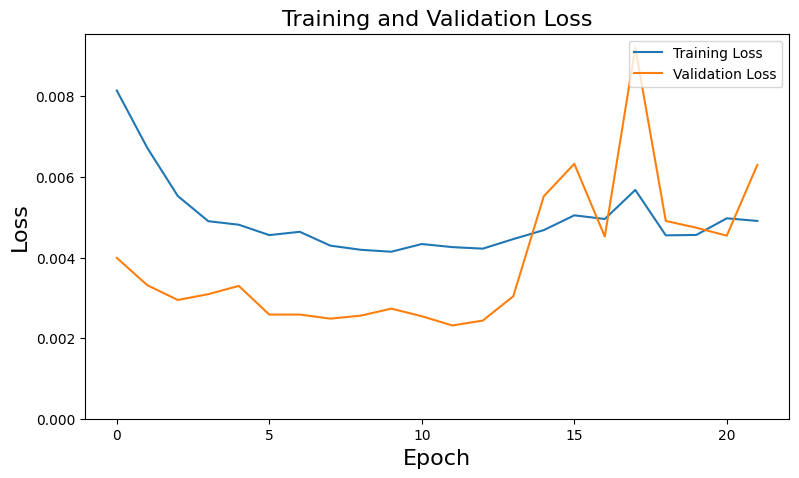

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize = 16)
plt.show()

## Evaluation

In [44]:
loss = model.evaluate(X_test, y_test, batch_size=1)
print("\nTest Loss: %.1f%%" % (100.0 * loss))

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0074

Test Loss: 0.6%


In [45]:
train_predict = model.predict(X_train)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [46]:
test_predict = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [47]:
train_predict = scaler_train.inverse_transform(train_predict)
test_predict = scaler_test.inverse_transform(test_predict)

In [48]:
y_train = scaler_train.inverse_transform(y_train)
y_test = scaler_test.inverse_transform(y_test)

In [49]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))

In [50]:
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [51]:
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 27.5497989654541
Test RMSE: 47.699913024902344


In [52]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2416,2015-04-15 11:09:56.026490112,2010-06-29 00:00:00,2012-11-19 18:00:00,2015-04-16 12:00:00,2017-09-07 06:00:00,2020-02-03 00:00:00,NaN
Open,2416.0,186.271147,16.139999,34.342498,213.035004,266.450012,673.690002,118.740163
High,2416.0,189.578224,16.629999,34.897501,216.745002,270.927513,786.140015,120.892329
Low,2416.0,182.916639,14.98,33.587501,208.870002,262.102501,673.52002,116.857591
Close,2416.0,186.403651,15.8,34.400002,212.960007,266.774994,780.0,119.13602
Adj Close,2416.0,186.403651,15.8,34.400002,212.960007,266.774994,780.0,119.13602
Volume,2416.0,5572721.688742,118500.0,1899275.0,4578400.0,7361150.0,47065000.0,4987809.151888


In [53]:
train_prediction_df = result_df[lookback:position]
train_prediction_df["Predicted"] = train_predict
train_prediction_df.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,38.423168
2010-07-29,20.350000,38.423168
2010-07-30,19.940001,38.423168
2010-08-02,20.920000,38.423168
2010-08-03,21.950001,38.423168


In [54]:
test_prediction_df = result_df[position+lookback:]
test_prediction_df["Predicted"] = test_predict
test_prediction_df.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,341.128571
2018-04-04,286.940002,337.968628
2018-04-05,305.720001,335.073151
2018-04-06,299.299988,337.302002
2018-04-09,289.660004,338.792725


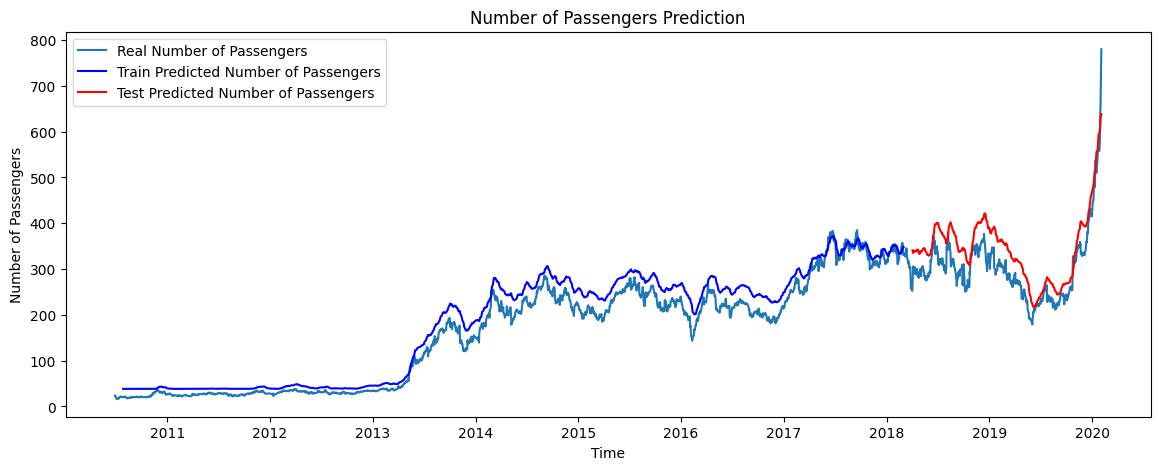

In [55]:
plt.figure(figsize=(14,5))
plt.plot(result_df, label = "Real Number of Passengers")
plt.plot(train_prediction_df["Predicted"], color = 'blue', label = "Train Predicted Number of Passengers")
plt.plot(test_prediction_df["Predicted"],color = 'red', label = "Test Predicted Number of Passengers")
plt.title("Number of Passengers Prediction")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()